## Importing all packages needed for analaysis

In [73]:
import numpy as np 
import pandas as pd
import os

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# # Importing the data

In [74]:
df= pd.read_csv(r'C:\Users\sushruth\Desktop\codechef.csv')
df.head()

,date,province,country,lat,long,type,cases
0,2020-01-22,NaN,Afghanistan,33.93911,67.709953,confirmed,0
1,2020-01-23,NaN,Afghanistan,33.93911,67.709953,confirmed,0
2,2020-01-24,NaN,Afghanistan,33.93911,67.709953,confirmed,0
3,2020-01-25,NaN,Afghanistan,33.93911,67.709953,confirmed,0
4,2020-01-26,NaN,Afghanistan,33.93911,67.709953,confirmed,0


# # Checking the dimensions of the dataset

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149935 entries, 0 to 149934
Data columns (total 7 columns):
date        149935 non-null object
province    43739 non-null object
country     149935 non-null object
lat         149935 non-null float64
long        149935 non-null float64
type        149935 non-null object
cases       149935 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.0+ MB


# converting all objects to respective datatype

In [76]:
df['date'] = pd.to_datetime(df['date'])
df['lat']=df['lat'].astype('int')
df['long']=df['long'].astype('int')
df['cases']=df['cases'].astype('int')

# # checking wheather he datasets are null or not

In [77]:
df.isnull().sum()

date             0
province    106196
country          0
lat              0
long             0
type             0
cases            0
dtype: int64

In [78]:
df['province']=df.apply(lambda x: x['country'] 
if pd.isnull(x['province']) 
else x['province'],axis=1)
df['province']=df.apply(lambda x: x['country'] if pd.isnull(x['province']) else x['province'],axis=1)

In [79]:
df.isnull().sum()

date        0
province    0
country     0
lat         0
long        0
type        0
cases       0
dtype: int64

In [80]:
df_update=df

# Checking the corelation using seaborn plot

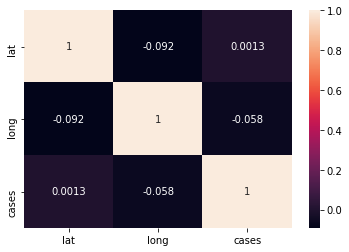

In [81]:
corr= df_update.corr()
sns.heatmap(corr,annot=True)

# CHECKING THE UNIQUE COUNTRY NAMES

In [82]:
print(df['country'].unique())
print("\nNumber of countries impacted by COVID 2019:",len(df['country'].unique()))

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'K

# Making a pieplot with all countries with ascending order

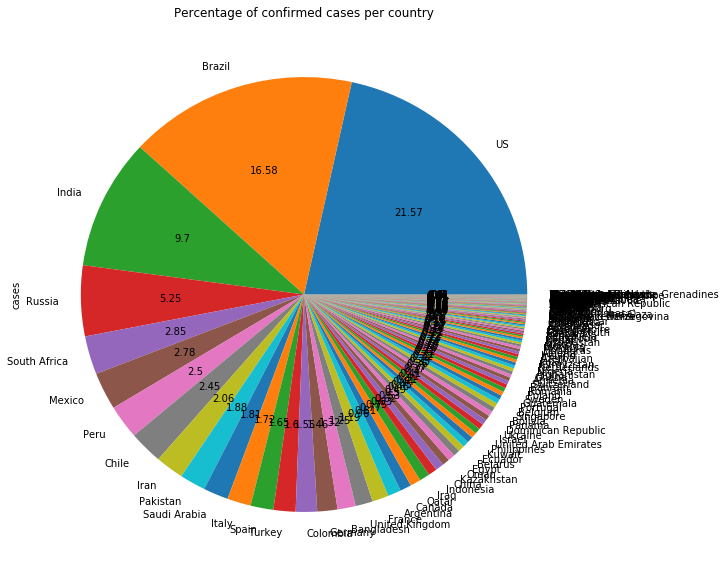

In [83]:
fig = plt.figure(figsize=(10,10))
conf_per_country = df_update.groupby('country')['cases'].sum().sort_values(ascending=False)
conf_sum=df_update['cases'].sum()
def absolute_value(val):
    a  = val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country',autopct=absolute_value)

plt.show ()

# investigating top 5 countires and investigating in covid cases

In [85]:
group_cases=df_update[['cases','long','lat','country']].groupby('country').sum().sort_values('cases',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

,country,cases,long,lat
0,US,6060811,-57300,22920
1,Brazil,4658172,-29223,-8022
2,India,2725812,44694,11460
3,Russia,1475253,60165,34953
4,South Africa,799582,12606,-17190


In [86]:
group_cases['cases']= group_cases['cases']
group_cases=group_cases.sort_values(by='cases', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

,country,cases,long,lat
0,US,6060811,-57300,22920
1,Brazil,4658172,-29223,-8022
2,India,2725812,44694,11460
3,Russia,1475253,60165,34953
4,South Africa,799582,12606,-17190


# drawing bar graph to visualize better

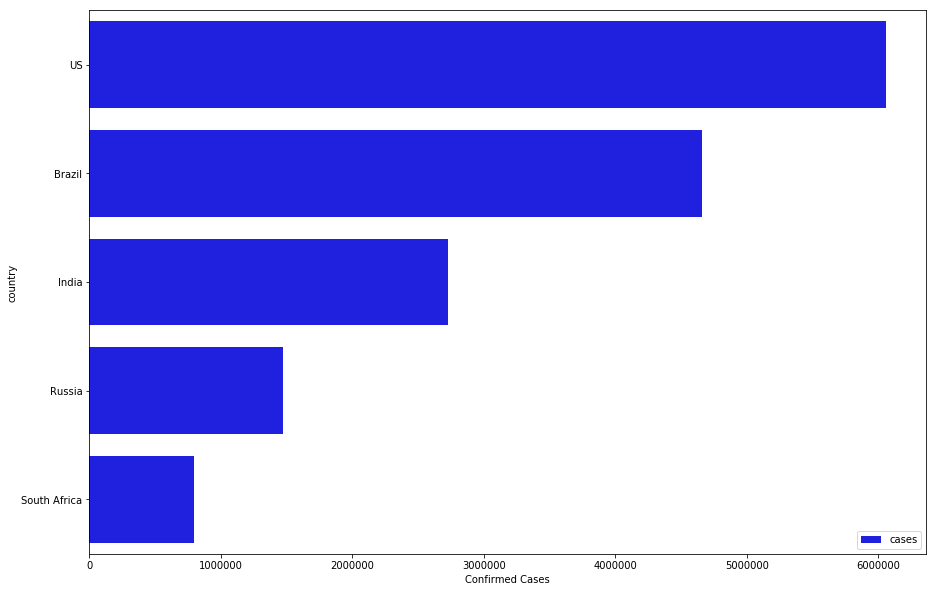

In [87]:
f, ax = plt.subplots(figsize=(15, 10))
bar1=sns.barplot(x="cases",y="country",data=group_cases,
            label="cases", color="b")

ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()

# checking for china as it was the epicenter

In [88]:
china_cases=df_update.loc[df_update['country']=='China']

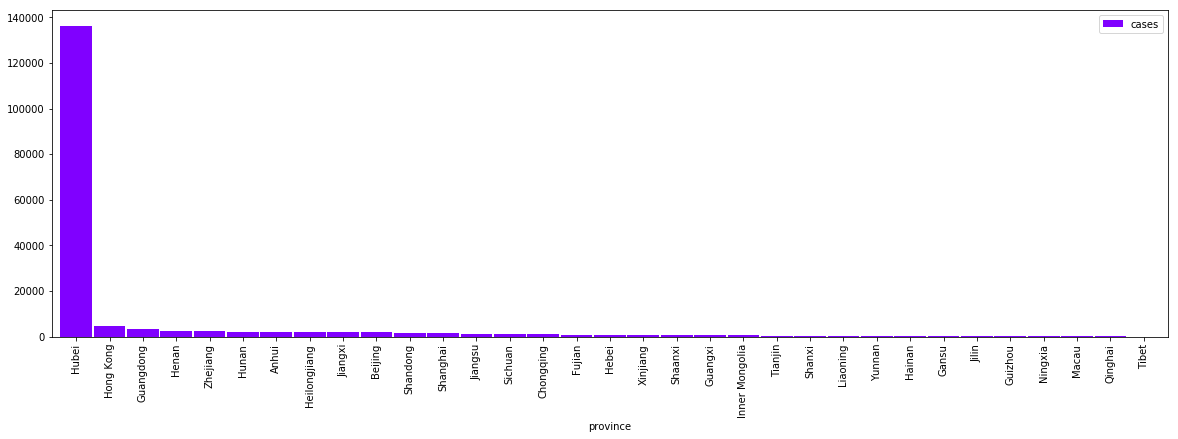

In [89]:
china_province_cases=china_cases[['cases','province']].groupby('province').sum().sort_values('cases',ascending=False)
china_province_cases.plot(kind='bar',width=0.95,colormap='rainbow',figsize=(20,6))
plt.show()

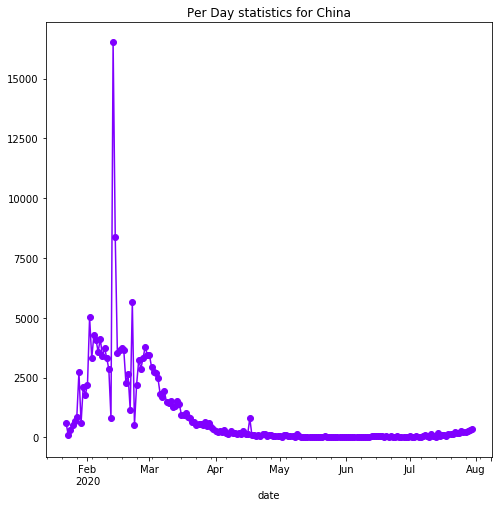

In [90]:
china_cases_complete=df.loc[df['country']=='China']
china_cases_complete['date'] = china_cases_complete['date'].dt.date
china_cases_complete['date']=pd.to_datetime(china_cases_complete['date'])
china_cases_complete = china_cases_complete[china_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = china_cases_complete.groupby('date')["cases"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for China',colormap='rainbow',marker='o')
plt.show()

In [91]:
num_plot_china=num_plot.reset_index()
num_plot_china['Confirmed Case Increase']=0
num_plot_china['Confirmed Case Increase'][0]=0
for i in range(1,num_plot_china.shape[0]):
    num_plot_china['Confirmed Case Increase'][i]=-(num_plot_china.iloc[i-1][1]-num_plot_china.iloc[i][1])
num_plot_china.tail()
    

,date,cases,Confirmed Case Increase
186,2020-07-26,239,-10
187,2020-07-27,224,-15
188,2020-07-28,259,35
189,2020-07-29,301,42
190,2020-07-30,363,62


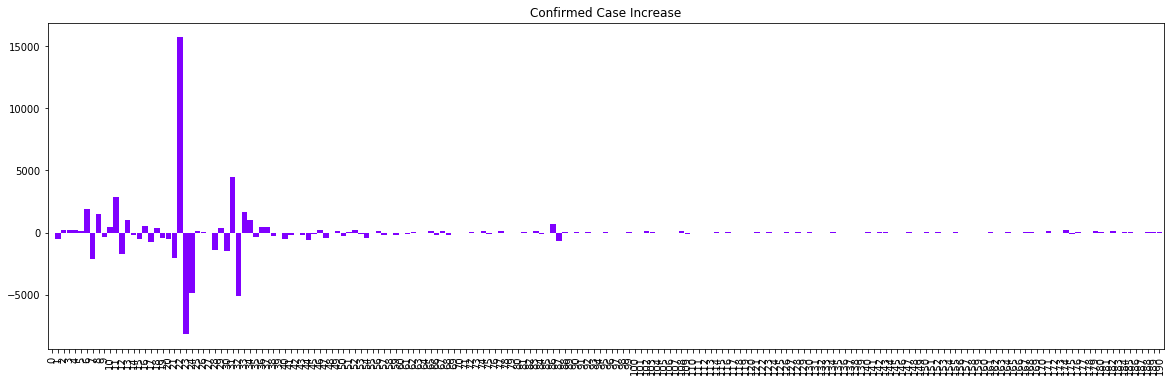

In [92]:
num_plot_china['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='rainbow')
plt.show()

# Checking for rest of the world except China

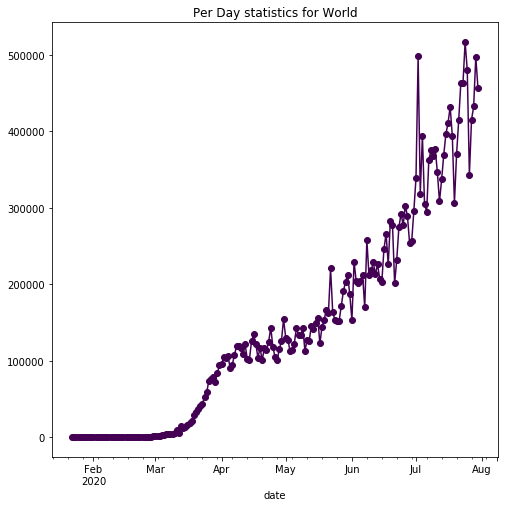

In [93]:
global_cases_complete=df.loc[~(df['country']=='China')]
global_cases_complete['date'] = global_cases_complete['date'].dt.date
global_cases_complete['date']=pd.to_datetime(global_cases_complete['date'])
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = global_cases_complete.groupby('date')["cases"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

In [94]:
num_plot_global=num_plot.reset_index()
num_plot_global['Confirmed Case Increase']=0
num_plot_global['Confirmed Case Increase'][0]=0
for i in range(1,num_plot_global.shape[0]):
    num_plot_global['Confirmed Case Increase'][i]=-(num_plot_global.iloc[i-1][1]-num_plot_global.iloc[i][1])
num_plot_global.tail()


,date,cases,Confirmed Case Increase
186,2020-07-26,343368,-136841
187,2020-07-27,414795,71427
188,2020-07-28,432331,17536
189,2020-07-29,497204,64873
190,2020-07-30,456487,-40717


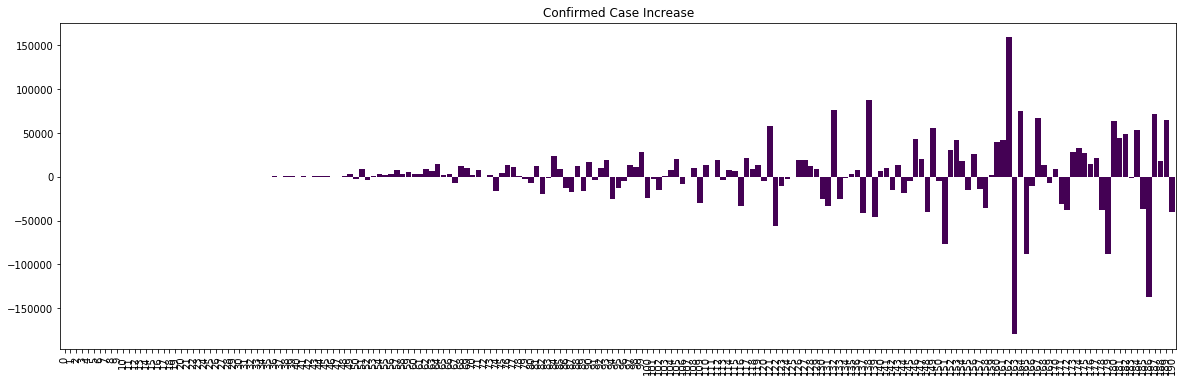

In [95]:
num_plot_global['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),title='Confirmed Case Increase',colormap='viridis')
plt.show()

# Checking for USA

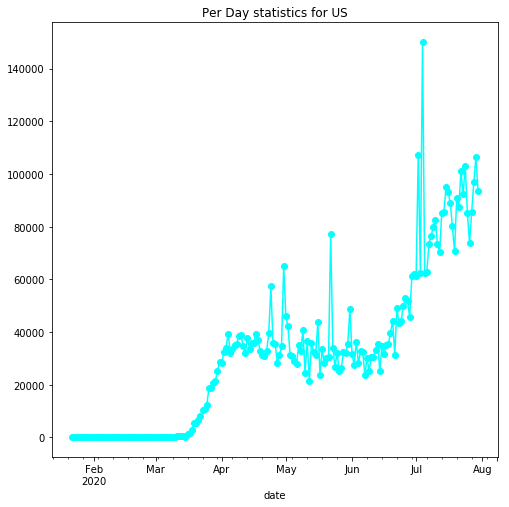

In [96]:
us_cases_complete=df.loc[df['country']=='US']
us_cases_complete['date'] = us_cases_complete['date'].dt.date
us_cases_complete['date']=pd.to_datetime(us_cases_complete['date'])
us_cases_complete = us_cases_complete[us_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = us_cases_complete.groupby('date')["cases"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for US',colormap='cool',marker='o')
plt.show()

In [97]:
num_plot_us=num_plot.reset_index()
num_plot_us['Confirmed Case Increase']=0
num_plot_us['Confirmed Case Increase'][0]=0
for i in range(1,num_plot_us.shape[0]):
    num_plot_us['Confirmed Case Increase'][i]=-(num_plot_us.iloc[i-1][1]-num_plot_us.iloc[i][1])
num_plot_us.tail()

,date,cases,Confirmed Case Increase
186,2020-07-26,73872,-11262
187,2020-07-27,85432,11560
188,2020-07-28,96790,11358
189,2020-07-29,106286,9496
190,2020-07-30,93582,-12704


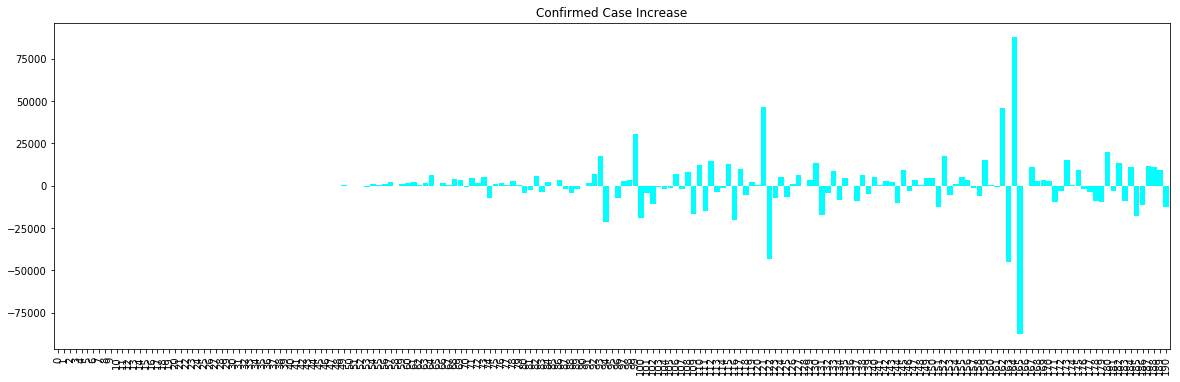

In [98]:
num_plot_us['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='cool',title='Confirmed Case Increase')
plt.show()